In [ ]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [2]:
%pip install distfit

Note: you may need to restart the kernel to use updated packages.


In [26]:
from distfit import distfit
import scipy.stats as ss
import numpy as np

a: 0.9914220643333334
b: 0.914062170281944
loc: -0.2180470790778588
scale: 49.21804707907786


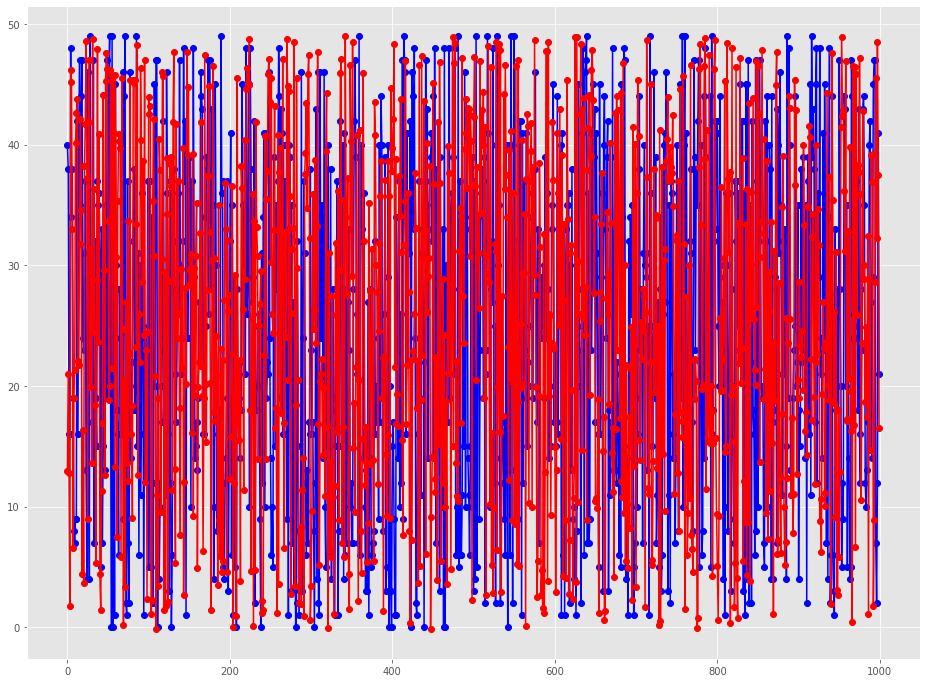

In [41]:
# Create 1000 random integers, value between [0-50]
X = np.random.randint(0, 50,1000)
a, b, loc, scale = ss.beta.fit(X)
print('a:', a)
print('b:', b)
print('loc:', loc)
print('scale:', scale)

x_test = ss.beta.rvs(a, b, loc, scale, size=1000)

plt.plot(X, color='b', marker='o')
plt.plot(x_test, color='r', marker='o')
plt.show()


In [6]:
# Create 1000 random integers, value between [0-50]
X = np.random.randint(0, 50,1000)

# Retrieve P-value for y
y = [0, 10, 45, 55, 100]

# From the distfit library import the class distfit


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0018648] [loc=25.125 scale=14.453] 
[distfit] >[expon     ] [RSS: 0.0065253] [loc=0.000 scale=25.125] 
[distfit] >[pareto    ] [RSS: 0.0065106] [loc=-7027646951.161 scale=7027646951.161] 
[distfit] >[dweibull  ] [RSS: 0.0016960] [loc=25.438 scale=14.038] 
[distfit] >[t         ] [RSS: 0.0018648] [loc=25.126 scale=14.453] 
[distfit] >[genextreme] [RSS: 0.0016244] [loc=21.467 scale=15.522] 
[distfit] >[gamma     ] [RSS: 0.0018654] [loc=-1350.993 scale=0.152] 
[distfit] >[lognorm   ] [RSS: 0.0018832] [loc=-583.387 scale=608.313] 
[distfit] >[beta      ] [RSS: 0.0010683] [loc=-4.329 scale=53.329] 
[distfit] >[uniform   ] [RSS: 0.0007068] [loc=0.000 scale=49.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.uniform_gen object at 0x117e21320>, 'params': (0.0, 49.0), 'name': 'uniform', 'RSS': 0.0007068287133397313, 'loc': 0.0, 'sc

[distfit] >plot summary..


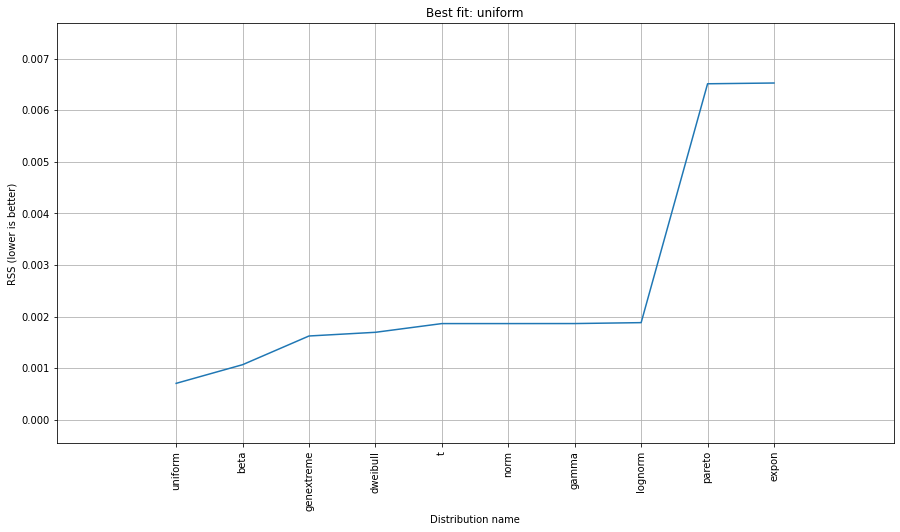

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: uniform'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [8]:
#Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

In [11]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


{'df':      y   y_proba y_pred         P
 0    0  0.020408   down  0.020408
 1   10  0.020408   none  0.020408
 2   45  0.020408   none  0.020408
 3   55  0.000000     up  0.000000
 4  100  0.000000     up  0.000000,
 'y_proba': array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ]),
 'y_pred': array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')}

[distfit] >plot..


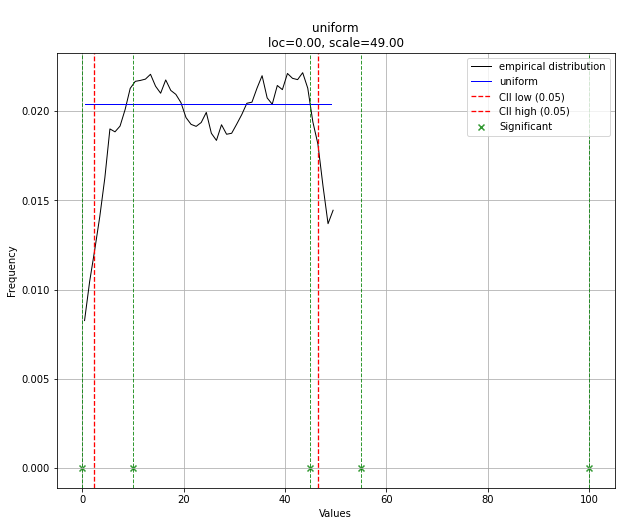

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nuniform\nloc=0.00, scale=49.00'}, xlabel='Values', ylabel='Frequency'>)

In [12]:
# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()

In [13]:
# method 2

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

KeyboardInterrupt: 

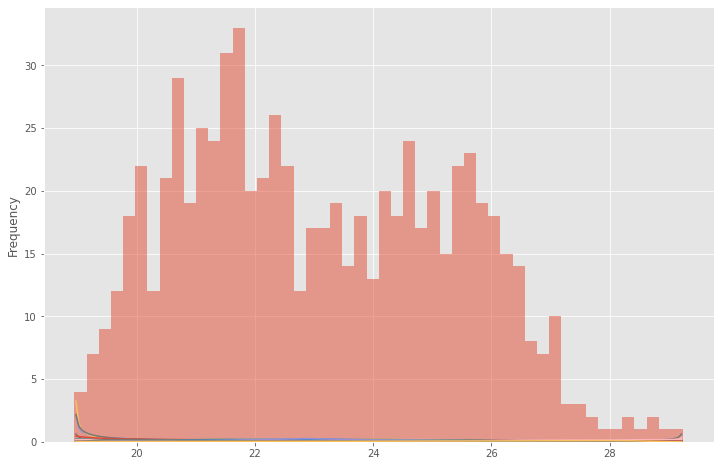

In [24]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
# method 3

In [ ]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 30000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()